In [1]:
import numpy as np

In [2]:
x = np.array([[10, 9.9],[1, 6.5],[2, 7.7],[3, 6],[4, 8],[5, 1],[6, 3.2],[7, 1.4],[8, 1],[9, 3]])
#x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([-1, -1,-1,-1,-1, 1,1,1,1,1 ])


In [3]:
def make_XXmXp(x, y, k):
    nmm = x[y == -1].shape[0]
    npp = x[y == 1].shape[0]
    
    X = np.zeros((len(y), len(y)))
    
    for i, xi in enumerate(x):
        for j, xj in enumerate(x):
            X[i, j] = k(xi, xj)
    
    Xm = X[y == -1].T
    Xp = X[y == 1].T
    
            
    return X, Xm, Xp

In [4]:
#k = lambda x,y: (np.dot(x,y) + 1)**2
k = np.dot
l = 0.01
X, Xm, Xp = make_XXmXp(x, y, k) 
Xm.shape
#Xm = Xm.T
#Xp = Xp.T

(10, 5)

In [5]:
alpha = 1/(2*l)*np.linalg.pinv(X) @ (np.sum(Xp, axis=1)[:, np.newaxis] - np.sum(Xm, axis=1)[:, np.newaxis])

In [6]:
alpha

array([[-20.58929877],
       [-62.23741409],
       [-66.58989781],
       [-39.26949511],
       [-52.35932681],
       [ 32.84600627],
       [ 17.57183757],
       [ 45.98440877],
       [ 59.10662101],
       [ 46.01678931]])

In [7]:
def g(alpha, k, x, xn):
    total = 0
    for ai, xi in zip(alpha, x):
        total += ai*k(xi, xn)
    return total

In [8]:
xx, yy = np.meshgrid(np.linspace(0, 10, 15), np.linspace(0, 10, 15))
y_r = np.array([g(alpha, k, x, xidx) for xidx in np.vstack((xx.ravel(), yy.ravel())).T])

In [9]:
import matplotlib.pyplot as plt

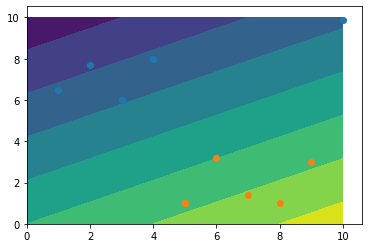

In [10]:
plt.figure()
plt.contourf(xx, yy, np.reshape(y_r, xx.shape))
plt.scatter(*x[y == -1].T)
plt.scatter(*x[y == 1].T)
plt.show()

In [11]:
np.vstack((xx.ravel(), yy.ravel())).shape

(2, 225)

In [12]:
alphalin = 1/(2*l)*np.linalg.inv(x @ x.T) @ (np.sum(Xp, axis=1)[:, np.newaxis] - np.sum(Xm, axis=1)[:, np.newaxis])

In [13]:
lin_class = alphalin.T @ x

In [14]:
def g_l(xn):
    return lin_class @ xn

In [15]:
y_rlin = np.array([g_l( xidx) for xidx in np.vstack((xx.ravel(), yy.ravel())).T])

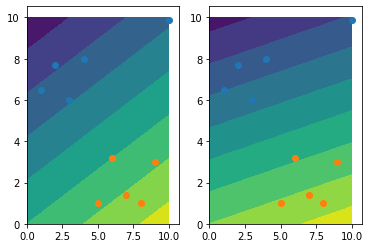

In [16]:
ax = plt.subplot(1,2,1)
plt.contourf(xx, yy, np.reshape(y_r, xx.shape))
plt.scatter(*x[y == -1].T)
plt.scatter(*x[y == 1].T)
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, np.reshape(y_rlin, xx.shape))
plt.scatter(*x[y == -1].T)
plt.scatter(*x[y == 1].T)
plt.show()

In [17]:
alpha

array([[-20.58929877],
       [-62.23741409],
       [-66.58989781],
       [-39.26949511],
       [-52.35932681],
       [ 32.84600627],
       [ 17.57183757],
       [ 45.98440877],
       [ 59.10662101],
       [ 46.01678931]])

In [18]:
alphalin

array([[ -256.],
       [-6144.],
       [    0.],
       [ 4096.],
       [ -256.],
       [-2048.],
       [ 1152.],
       [  256.],
       [ -512.],
       [  768.]])